In [1]:
from src.models.cnn import CNNTrainer
from src.data import WaveDataset, SpectrogramDataset
from src.features import WaveProcessor, WaveProcessorConfig

import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split

import os

In [2]:
wdir = os.getcwd().replace("\\", "/")
processed_dir = f"{wdir}/data/processed"
sr = 44100 // 8
wav_dataset = WaveDataset(f"{wdir}/data/raw/train_data", sr=sr, max_sec=30)
wpconfig = WaveProcessorConfig(sr=sr)
wp = WaveProcessor(wpconfig)

wav_loader = DataLoader(wav_dataset, batch_size=1, shuffle=False)

In [3]:
# for b, (xs, ys, fnames) in enumerate(wav_loader):
#     for x, y, fname in zip(xs, ys, fnames):
#         input_spec = wp.wav2freq(x)
#         label_spec = wp.wav2freq(y)

#         SpectrogramDataset.save(input_spec, f"{processed_dir}/train_data", fname)
#         SpectrogramDataset.save(
#             label_spec, f"{processed_dir}/train_labels", fname, is_label=True
#         )
#         SpectrogramDataset.save_metadata(
#             wpconfig.to_dict(), f"{processed_dir}/train_meta", fname
#         )

In [4]:
spec_dataset = SpectrogramDataset(
    f"{processed_dir}/train_data", label_dir=f"{processed_dir}/train_labels"
)

token_size = spec_dataset[0][0].shape[0]
seq_size = spec_dataset[0][0].shape[1]
out_size = spec_dataset[0][1].shape[1]

train_set, val_set = random_split(spec_dataset, [0.8, 0.2])

train_loader = DataLoader(train_set, batch_size=5, shuffle=True)
val_loader = DataLoader(val_set, batch_size=5, shuffle=True)

In [5]:
trainer = CNNTrainer()
trainer.create_model(token_size, seq_size, 2, out_size)
trainer.set_dataloaders(train_loader, val_loader, None)
history = trainer.train(0.001, 0.001, 10)


Epoch: 0 	Training Loss: 59.6364 	Validation Loss: 48.9092
	 	Training Accuracy: 14.55% 	Validation Accuracy: 19.19%

Epoch: 1 	Training Loss: 59.2821 	Validation Loss: 48.6192
	 	Training Accuracy: 21.12% 	Validation Accuracy: 23.23%

Epoch: 2 	Training Loss: 58.9062 	Validation Loss: 48.5534
	 	Training Accuracy: 23.98% 	Validation Accuracy: 25.53%

Epoch: 3 	Training Loss: 58.5989 	Validation Loss: 53.9971
	 	Training Accuracy: 25.47% 	Validation Accuracy: 28.26%

Epoch: 4 	Training Loss: 58.4832 	Validation Loss: 48.2613
	 	Training Accuracy: 26.42% 	Validation Accuracy: 24.03%

Epoch: 5 	Training Loss: 58.1673 	Validation Loss: 50.8320
	 	Training Accuracy: 27.37% 	Validation Accuracy: 29.31%

Epoch: 6 	Training Loss: 58.1354 	Validation Loss: 48.4500
	 	Training Accuracy: 27.57% 	Validation Accuracy: 26.17%

Epoch: 7 	Training Loss: 57.8634 	Validation Loss: 48.1834
	 	Training Accuracy: 29.50% 	Validation Accuracy: 27.44%

Epoch: 8 	Training Loss: 57.7369 	Validation Loss: 49.2

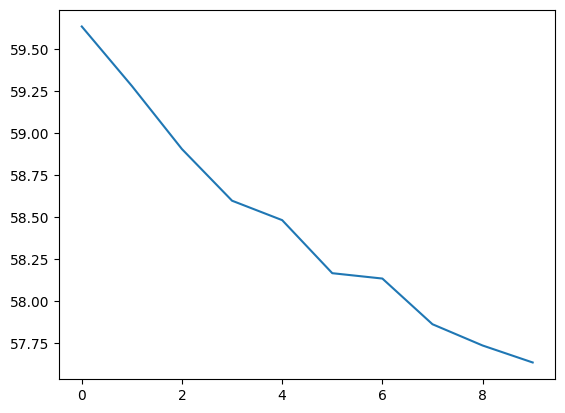

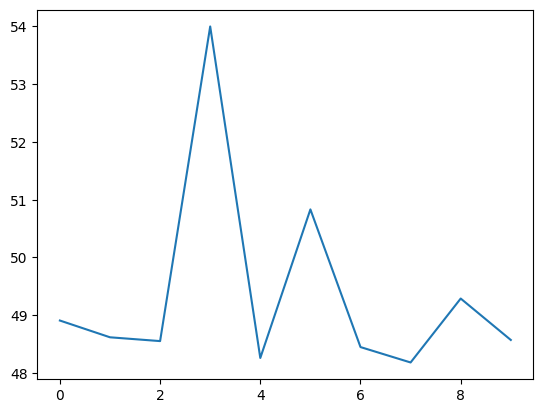

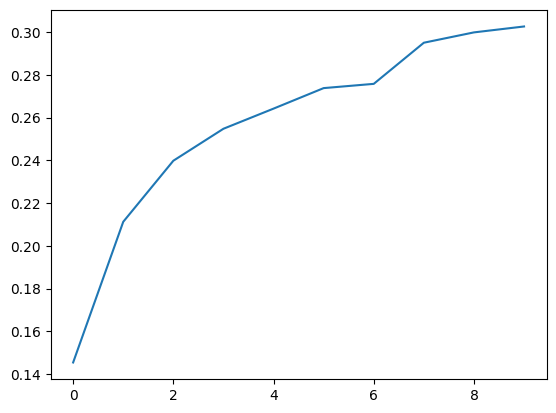

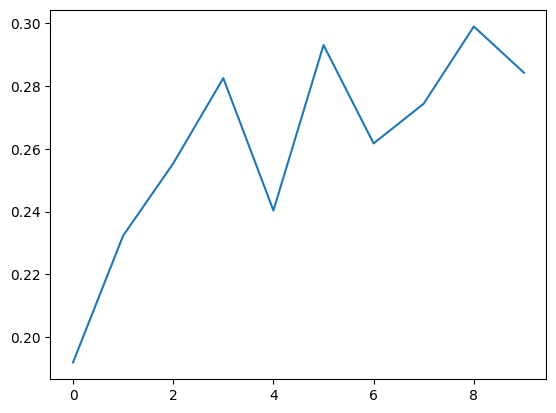

In [6]:
import matplotlib.pyplot as plt
import numpy as np

val_loss = history["val_loss"].to_list()
train_loss = history["train_loss"].to_list()
val_acc = history["val_acc"].to_list()
train_acc = history["train_acc"].to_list()
x = np.arange(history.shape[0])

fig = plt.figure(0)
plt.plot(x, train_loss)
fig = plt.figure(1)
plt.plot(x, val_loss)
fig = plt.figure(2)
plt.plot(x, train_acc)
fig = plt.figure(3)
plt.plot(x, val_acc)
plt.show()